<center><img src="SD.jpg " width="1000px" class="imageGauche" alt="sd" /></center>


# <br><center><b style="color:#E25033;"><u>Text Analysis</u></b></center>
<center><font size="+2"><b><u>Classification des documents du procès des groupes américains du tabac</u></b> </font></center>

<br><br><b>Master2 SID</b><br>
Science des Données<br>
Année universitaire 2018-2019<br>

<b><u> Réalisé par :</u></b> Bahlouli Mohammed Nassim <br>
<b><u>Encadré par :</u></b>Mr. Christopher Kermorvant<br>
Christopher.Kermorvant@univ-rouen.fr<br><br>


<br><br><br><b><font size="+2" style="color:#E25033;"><u>1) Contexte :</u> </font></b>

Le gouvernement américain a attaqué en justice cinq grands groupes américains du tabac pour avoir amassé d'importants bénéfices en mentant sur les dangers de la cigarette. Le cigarettiers  se sont entendus dès 1953, pour "mener ensemble une vaste campagne de relations publiques afin de contrer les preuves de plus en plus manifestes d'un lien entre la consommation de tabac et des maladies graves".
Dans ce procès 14 millions de documents ont été collectés et numérisés. Afin de faciliter l'exploitation de ces documents par les avocats, vous êtes en charge de mettre en place une classification automatique des types de documents.
Un échantillon aléatoire des documents a été collecté et des opérateurs ont classé les documents dans des répertoires correspondant aux classes de documents : lettres, rapports, notes, email, etc. Nous avons à notre disposition :

- les images de documents : http://data.teklia.com/Images/Tobacco3482.tar.gz

- le texte contenu dans les documents obtenu par OCR (reconnaissance automatique) : Tobacco3482-OCR.tar.gz  (dans ce git)
- les classes des documents définies par des opérateurs : Tobacco3482.csv (dans ce git)

<br><br><br><b><font size="+2" style="color:#E25033;"><u>2) Travail demandé :</u> </font></b>

On doit mettre en oeuvre une méthodologie de projet de Machine Leaning pour fournir :

- une analyse des données
- une analyse du problème et un choix justifié de solution
- un script python mettant en oeuvre la solution retenue
- une analyse des performances de la solution implémentée
- des pistes d'améliorations

Les analyses seront écrite dans un fichier rapport.md (syntaxe markdown)
Notre code doit permettre de réaliser deux fonctions :

- entrainer un classifieur
- tester un classifieur

Notre code doit être auto-suffisant : il doit contenir un script permettant d'executer ces deux fonctions sur le jeu de données automatiquement.
<br>Tout notre travail sera commit dans le gitlab du cours (voir invitation).

<br><br><br><b><center><font size="+3" style="color:#E25033;"><u>3) Travail réalisé : </u> </font></center></b>

<br><b><font size="+2" style="color:#239E8B;"><u>3.1 ) Analyse des données  </u> </font></b> <br>


14 millions de documents ont été collecté par l'État américain , néanmoins nous disposons seulement d'une partie de ces documents qui est equivalent à ( 3482 documennts). 
<br>On dispose d'un fichier .csv contenant le chemin vers les images et leurs labels associées , on dispose aussi également d'un fichier contenant les textes de ces images.
<br>

J'ai commencé par lire et afficher les données : 

<b><font size="+1"><u>1) lecture des données  </u> </font></b> <br><br>
<br> lecture du fichier 'Tobacco3482.csv' qui contient les chemins vers les images ainsi que leurs labels 

In [150]:
import pandas as pd
Data= pd.read_csv('Tobacco3482.csv')
print(Data[:10])

                       img_path          label
0  Advertisement/0000136188.jpg  Advertisement
1  Advertisement/0000435350.jpg  Advertisement
2  Advertisement/0000556056.jpg  Advertisement
3  Advertisement/0030048095.jpg  Advertisement
4  Advertisement/0030048989.jpg  Advertisement
5  Advertisement/0030049569.jpg  Advertisement
6    Advertisement/03496270.jpg  Advertisement
7    Advertisement/03567810.jpg  Advertisement
8    Advertisement/03722789.jpg  Advertisement
9    Advertisement/04102204.jpg  Advertisement


<br><b><font size="+1"><u>2) Affichage des données par label:  </u> </font></b> <br><br>
j'ai affiché un diagramme d'apparation de chaque catégorie dans le Dataset


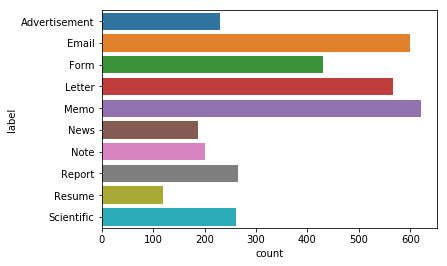

In [151]:
import seaborn as sns
%matplotlib inline

sns.countplot(data=Data,y='label')

On remarque que le nombre de données des labels ( Email, Letter ,  memo et Form ) et beaucoup plus elevé que les autres labels(type de documents)


<br><br><b>j'ai ensuite attribué chaque texte a son label</b>

In [152]:
Data_txt=[]
Data_txt=Data

NB = Data_txt.shape[0]
for i in range (NB):
    A = Data_txt.get_value(i, 'img_path')
    Data_txt.set_value(i, 'img_path', 'Tobacco3482-OCR/'+A)
    Data_txt.set_value(i, 'img_path', Data_txt.get_value(i, 'img_path').split('.jpg')[0]+'.txt')
    Data_txt.set_value(i, 'img_path',open(Data_txt.get_value(i, 'img_path'), "r",encoding="utf8").read())


In [153]:
####### attribuer le texte a son label ########
Data_txt.columns = ['text','label']
print(Data_txt.head())


                                                text          label
0  A Mpertant as yar\nsesiye teaetered cabiieess....  Advertisement
1  TE che fitm\n\nm66400 7127\n\nKOOLS are the on...  Advertisement
2  so ARN Rr nr\n\nBWR Ga ||\n\nVending Operators...  Advertisement
3  MARCH 24,19 VO — 3. Tersrearep\n\n \n\n‘ yi il...  Advertisement
4  ~\n\nSpend a milder moment qs\nwith Raleigh.\n...  Advertisement


<br><br><b>Exemple de texte : </b>

In [154]:
Data_txt.iloc[11].text

'DRAFT ADVERTISEMENT\n\nthat without the extra\n11,500,000 tax smokers pay\n\neach day, we could be faced with\nan increase of nearly 5p in the &\n\nIssued by the Tobacco Advisory Council, speaking up forsmokers. |\n\nGlen House, Stag Place, London SWIE5AG'

<br><br><b><font size="+2" style="color:#239E8B;"><u>3.2)Traitement des données :  </u> </font></b> 


<br><b><font size="+1" style="color:#e69900;"><u>3.2.1) Diviser les données  : </u> </font></b>

<br>J'ai commencé par :
- Diviser les données en trois ensembles : Données d'apprentissage ,Données de validation , Données de test 

<br>Comme on ne possède pas d'un grand nombre de données (3482), j'ai choisis donc d'utiliser 60% des données pour l'ensemble d'apprentissage , 20% des données pour l'ensemble de validation et enfin 20% qui restent pour l'ensemble de test



In [155]:
from sklearn.model_selection import train_test_split

(X_train,X_app,y_train,y_app) = train_test_split(Data_txt['text'],Data_txt['label'],test_size=0.4)
(X_test,X_val,y_test,y_val) = train_test_split(X_app,y_app,test_size=0.5)

<br><b>la taille des 3 ensemble : </b>

In [156]:
print('Taille des données d apprentissage =',X_train.shape[0],'Taille des données de test=',X_test.shape[0],'Taille des données de validation=',X_val.shape[0])

Taille des données d apprentissage = 2089 Taille des données de test= 696 Taille des données de validation= 697


In [157]:
print(y_train[:10])

1120             Form
1438           Letter
294             Email
473             Email
1309           Letter
1743           Letter
203     Advertisement
813             Email
928              Form
2308             Memo
Name: label, dtype: object


<br><b><font size="+1" style="color:#e69900;"><u>3.2.2) Bag of word : </u> </font></b>

In [158]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train)
X_train_vecteur = vectorizer.transform(X_train)
X_val_vecteur = vectorizer.transform(X_val)
X_test_vecteur= vectorizer.transform(X_test)


<br><b><font size="+1" style="color:#e69900;"><u>3.2.3) TF-IDF Representation : </u> </font></b>

Après la séparation des données en 3 ensemble on doit transformer les textes en vecteurs, en s'appuyant
 sur la méthode CountVectorizer de sklearn. qui permet d'effectuer la convertion des documents texte en matrice contenant le nombre d'occurence de chaque symbole 
 <br>Dans mon cas j'ai fixé les paramètres à 2000.

In [159]:
tf_transformer = TfidfTransformer().fit(X_train_vecteur)

X_train_tf = tf_transformer.transform(X_train_vecteur)
X_val_tf = tf_transformer.transform(X_val_vecteur)
X_test_tf = tf_transformer.transform(X_test_vecteur)

<br><b><font size="+1" style="color:#e69900;"><u>3.2.4) Naive Bayes (Bag of word )  : </u> </font></b>

j'ai choisi d'utiliser un algorithme de classification naïve Bayésienne simple car il est adapté à l'apprentissage supervisé, de plus il est simple à implementer et donne de bons résultats .



In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Multi_nb = MultinomialNB()
Multi_nb.fit(X_train_vecteur,y_train)

y_pred_train = Multi_nb.predict(X_train_vecteur)
print("Precision(Phase de train) : ",accuracy_score(y_train,y_pred_train))

y_pred_val = Multi_nb.predict(X_val_vecteur)
print("Precision(Phase de validation) : ",accuracy_score(y_val,y_pred_val))

y_pred_test = Multi_nb.predict(X_test_vecteur)
print("Precision (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")


Precision(Phase de train) :  0.818573480134
Precision(Phase de validation) :  0.734576757532
Precision (Phase de test) :  0.729885057471 



<font size="+1.5" style="color:#E25033;">j'ai obtenu une precision de 72% sur les données de test en utilisant le classifieur de naïves bayes avec Bag of word</font>


In [163]:
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

               precision    recall  f1-score   support

Advertisement       0.71      0.64      0.67        47
        Email       0.97      0.96      0.96       119
         Form       0.77      0.78      0.78        91
       Letter       0.75      0.63      0.69       114
         Memo       0.56      0.77      0.65       111
         News       0.70      0.77      0.73        39
         Note       0.46      0.31      0.37        36
       Report       0.72      0.56      0.63        73
       Resume       0.96      1.00      0.98        27
   Scientific       0.60      0.67      0.63        39

  avg / total       0.74      0.73      0.73       696

[[ 30   0   1   0   8   2   4   1   0   1]
 [  0 114   0   1   4   0   0   0   0   0]
 [  7   0  71   1   5   0   4   1   0   2]
 [  0   0   1  72  23   2   2  10   0   4]
 [  2   2   1  13  86   2   1   1   0   3]
 [  3   0   1   0   1  30   1   1   0   2]
 [  0   2   7   2  12   1  11   1   0   0]
 [  0   0   3   7  12   3   1  41   

<br><br><br><b><font size="+1" style="color:#e69900;"><u>3.2.5) Naive Bayes (TF-IDF Representation )  : </u> </font></b>

In [164]:
Multi_nb.fit(X_train_tf, y_train)

pred_train_tf = Multi_nb.predict(X_train_tf)
pred_val_tf = Multi_nb.predict(X_val_tf)
pred_test_tf = Multi_nb.predict(X_test_tf)



print("Precision(Phase de train) : : ", accuracy_score(y_train, pred_train_tf))

print("Precision(Phase de validation)t : ", accuracy_score(y_val, pred_val_tf))

print("Precision(Phase de test) : ", accuracy_score(y_test, pred_test_tf))

Precision(Phase de train) : :  0.724748683581
Precision(Phase de validation)t :  0.649928263989
Precision(Phase de test) :  0.653735632184


<font size="+1.5" style="color:#E25033;">j'ai obtenu une precision de 65% sur les données de test en utilisant le classifieur de naïves bayes avec TF-IDF Representation</font>


In [165]:
print(classification_report(y_test,pred_test_tf))
print(confusion_matrix(y_test,pred_test_tf))

               precision    recall  f1-score   support

Advertisement       0.91      0.45      0.60        47
        Email       0.95      0.96      0.95       119
         Form       0.73      0.80      0.76        91
       Letter       0.58      0.67      0.62       114
         Memo       0.43      0.93      0.59       111
         News       0.88      0.38      0.54        39
         Note       0.50      0.03      0.05        36
       Report       0.67      0.03      0.05        73
       Resume       0.96      1.00      0.98        27
   Scientific       0.77      0.59      0.67        39

  avg / total       0.71      0.65      0.61       696

[[ 21   1   5   5  13   1   1   0   0   0]
 [  0 114   0   0   5   0   0   0   0   0]
 [  0   0  73   1  14   0   0   0   0   3]
 [  0   0   0  76  38   0   0   0   0   0]
 [  0   2   0   6 103   0   0   0   0   0]
 [  2   0   2  15   4  15   0   0   0   1]
 [  0   2  13   3  17   0   1   0   0   0]
 [  0   1   2  23  41   0   0   2   

<br><br><br><b><font size="+1" style="color:#e69900;"><u>3.2.6) Neural Network Classifier ( avec bag of word )  : </u> </font></b>

In [166]:
MLP = MLPClassifier(activation='relu', alpha=1.0, verbose=2, batch_size=50)

MLP.fit(X_train_vecteur, y_train)

pred_tmlp = MLP.predict(X_train_vecteur)
pred_vmlp = MLP.predict(X_val_vecteur)
pred_temlp = MLP.predict(X_test_vecteur)



print("Precision(Phase de train) : ", accuracy_score(y_train, pred_tmlp))

print("Precision(Phase de validation) : ", accuracy_score(y_val, pred_vmlp))

print("Precision(Phase de test): ", accuracy_score(y_test, pred_temlp))

Iteration 1, loss = 3.05346430
Iteration 2, loss = 1.68383383
Iteration 3, loss = 1.22934294
Iteration 4, loss = 1.03167982
Iteration 5, loss = 0.92508756
Iteration 6, loss = 0.86253036
Iteration 7, loss = 0.82263200
Iteration 8, loss = 0.79086775
Iteration 9, loss = 0.77093732
Iteration 10, loss = 0.76396284
Iteration 11, loss = 0.76216121
Iteration 12, loss = 0.76801630
Iteration 13, loss = 0.75125973
Iteration 14, loss = 0.73821793
Iteration 15, loss = 0.72558279
Iteration 16, loss = 0.72604594
Iteration 17, loss = 0.72708056
Iteration 18, loss = 0.72158990
Iteration 19, loss = 0.72115525
Iteration 20, loss = 0.73312165
Iteration 21, loss = 0.73643530
Iteration 22, loss = 0.72475279
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Precision(Phase de train) :  0.962182862614
Precision(Phase de validation) :  0.783357245337
Precision(Phase de test):  0.781609195402


<font size="+1.5" style="color:#E25033;"> Aprés 22 iteration j'ai obtenu une precision de 78% sur les données de test en utilisant le classifieur de Multi layer perceptron ( MLP) avec bag of word </font>


<br><br><br><b><font size="+1" style="color:#e69900;"><u>3.2.7) Neural Network Classifier ( avec TF-IDF Representation )  : </u> </font></b>

In [167]:
print(classification_report(y_test, pred_temlp))
print(confusion_matrix(y_test,pred_temlp))



               precision    recall  f1-score   support

Advertisement       0.86      0.66      0.75        47
        Email       0.98      0.97      0.97       119
         Form       0.80      0.86      0.83        91
       Letter       0.84      0.65      0.73       114
         Memo       0.69      0.94      0.80       111
         News       0.87      0.69      0.77        39
         Note       0.52      0.75      0.61        36
       Report       0.64      0.51      0.56        73
       Resume       0.96      1.00      0.98        27
   Scientific       0.62      0.62      0.62        39

  avg / total       0.79      0.78      0.78       696

[[ 31   0   2   0   0   1  11   1   0   1]
 [  0 115   0   1   3   0   0   0   0   0]
 [  2   0  78   0   3   0   7   0   0   1]
 [  0   2   2  74  24   1   1   8   0   2]
 [  1   0   0   2 104   0   1   0   0   3]
 [  2   0   0   0   1  27   2   5   0   2]
 [  0   0   6   0   2   0  27   0   0   1]
 [  0   0   5  11  12   2   0  37   

<font size="+1.5" style="color:#E25033;">j'ai obtenu une precision de 79% sur les données de test en utilisant le classifieur de Multi layer perceptron ( MLP) avec avec TF-IDF Representation</font>


<br><br><br> <font size="+1.5" style="color:#E25033;">on remarque que MLP a de meilleures performances que Naive bayes</font>